In [4]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx

# Binomial/Random


In [108]:
#1.1 Initializing a list to give me random tuples
# Mostly based on thinkcomplexity textbook
def rand_pairs(N,p):
    for i,u in enumerate(N):
        for j,v in enumerate(N):

            #1.2 Take into consideration probability of an edge P
            # if its less than P, then it will added to the list, if not then delete
            if i>j:
                if np.random.rand() <= p:
                    #print( [u,v])
                    yield [u,v]
                    #yield u,v


In [101]:
# Testing lang
rand_pairs(range(6),0.5)

[1, 0]
[3, 0]
[3, 1]
[4, 0]
[4, 1]
[4, 3]
[5, 0]
[5, 3]


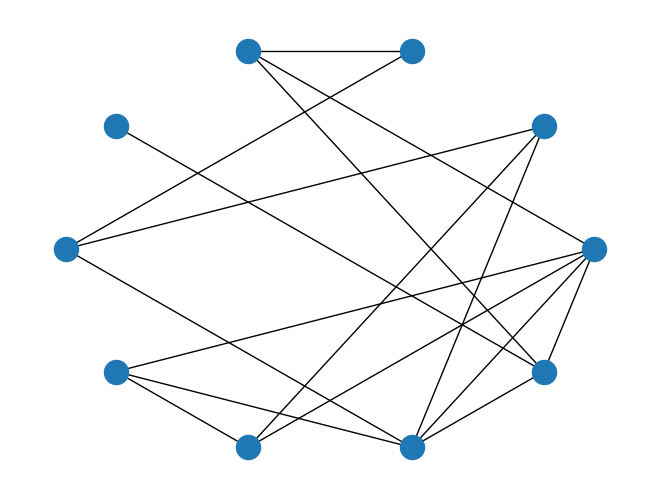

In [170]:
#1.3 Create a function to draw the graph

def BinomialG(N,p):
    Binomial_Graph = nx.Graph()
    nodes = range(N)

    Binomial_Graph.add_nodes_from(nodes)                        # Creates a node
    Binomial_Graph.add_edges_from(rand_pairs(nodes,p))          # Creates the edges derived from pairs
    return Binomial_Graph



#1.4 Do the graph
nx.draw_circular(BinomialG(10,0.4))



# Small World

In [8]:
# 2.1 Create pairs
def smolworld_pairs(N,k,b):
    pairs = []                                          # put them on a list

    # Adjacent pairs, just trust me bro
    for i in range(N):
        l = (i + (k/2))
        j = i
        for loopx in range(0,k-1,2):
            j = (j + 1)%N
            if i > j: pairs.append([i,j])
        
        l = (i - (k/2))
        j = i
        for loopy in range(0,k-1,2):
            j = (j - 1)%N
            if i > j: pairs.append([i,j]) 
    

    # probability for rewiring
    for o in range(len(pairs)):
        if np.random.rand() <= b:
            if np.random.randint(0,2) == 0:
                pairs[o][0] = np.random.choice([m for m in range(N) if m != pairs[o][1]])
            else:
                pairs[o][1] = np.random.choice([m for m in range(N) if m != pairs[o][0]])

        
    return pairs

In [9]:
# Function for Graphing
def SmallWorld_G(N,k,b):
    SW_Graph = nx.Graph()
    SW_Graph.add_nodes_from(range(N))
    SW_Graph.add_edges_from(smolworld_pairs(N,k,b))
    return SW_Graph

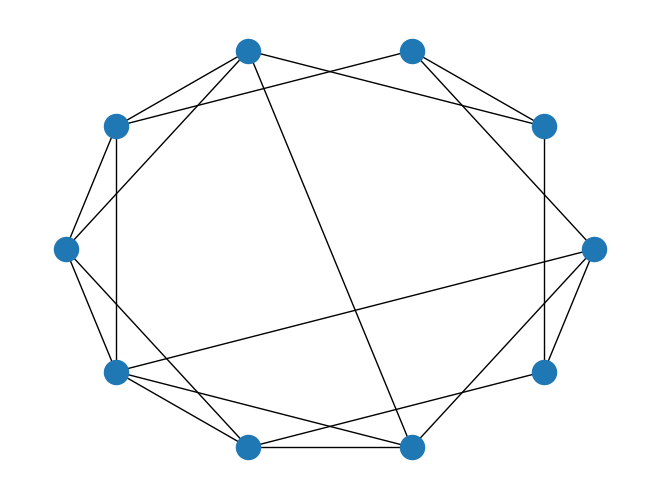

In [12]:
#Graph the function
nx.draw_circular(SmallWorld_G(10,4,0.20))

#OK LOGO NG CSG LETS GO


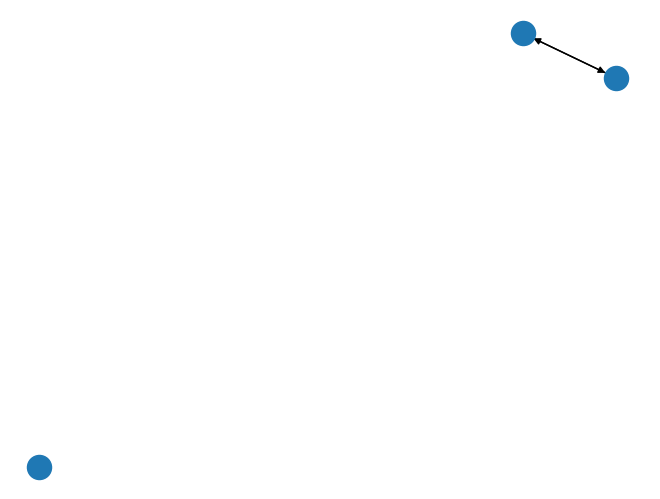

In [175]:
#Testing testing lang
list = [[1,2],[2,1]]

G = nx.DiGraph()
G.add_node(1)
G.add_node(2)
G.add_node(3)

G.add_edges_from(list)

nx.draw(G)